In [23]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np

In [91]:
raw_data = pd.read_pickle("data_bio482.pkl")

In [93]:
data_processed = raw_data.drop(["Sweep_PassiveContactTimes", "Sweep_ActiveContactTimes"], axis=1)
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [ ]:
columns_with_arrays = [
    "Sweep_MembranePotential",
    "Sweep_QuietTimes",
    "Sweep_WhiskerAngle",
    "Sweep_WhiskingTimes",
]

In [ ]:
data_processed[]

In [94]:
data_processed.columns

Index(['Cell_APThreshold_Slope', 'Cell_Anatomy', 'Cell_Counter', 'Cell_Depth',
       'Cell_ID', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type',
       'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_Counter', 'Sweep_MembranePotential',
       'Sweep_MembranePotential_SamplingRate', 'Sweep_QuietTimes',
       'Sweep_StartTime', 'Sweep_Type', 'Sweep_WhiskerAngle',
       'Sweep_WhiskerAngle_SamplingRate', 'Sweep_WhiskingTimes'],
      dtype='object')

In [5]:
data_free_whisking = raw_data[raw_data['Sweep_Type']=='free whisking'] 

In [33]:
data_free_whisking.dtypes

Cell_APThreshold_Slope                  float64
Cell_Anatomy                             object
Cell_Counter                            float64
Cell_Depth                              float64
Cell_ID                                  object
Cell_Layer                               object
Cell_TargetedBrainArea                   object
Cell_Type                                object
Cell_tdTomatoExpressing                  object
Mouse_DateOfBirth                       float64
Mouse_Genotype                           object
Mouse_Name                               object
Mouse_Sex                                object
Sweep_ActiveContactTimes                 object
Sweep_Counter                           float64
Sweep_MembranePotential                  object
Sweep_MembranePotential_SamplingRate    float64
Sweep_PassiveContactTimes                object
Sweep_QuietTimes                         object
Sweep_StartTime                         float64
Sweep_Type                              

In [35]:
data_free_whisking.columns.tolist()

['Cell_APThreshold_Slope',
 'Cell_Anatomy',
 'Cell_Counter',
 'Cell_Depth',
 'Cell_ID',
 'Cell_Layer',
 'Cell_TargetedBrainArea',
 'Cell_Type',
 'Cell_tdTomatoExpressing',
 'Mouse_DateOfBirth',
 'Mouse_Genotype',
 'Mouse_Name',
 'Mouse_Sex',
 'Sweep_ActiveContactTimes',
 'Sweep_Counter',
 'Sweep_MembranePotential',
 'Sweep_MembranePotential_SamplingRate',
 'Sweep_PassiveContactTimes',
 'Sweep_QuietTimes',
 'Sweep_StartTime',
 'Sweep_Type',
 'Sweep_WhiskerAngle',
 'Sweep_WhiskerAngle_SamplingRate',
 'Sweep_WhiskingTimes']

In [43]:
data_free_whisking["Sweep_MembranePotential"].iloc[0]

array([-0.04210312, -0.04212813, -0.04211875, ..., -0.04156563,
       -0.04155   , -0.04157812])

In [31]:
np.unique(data_free_whisking["Cell_Layer"])

array(['L2/3', 'L4', 'L5'], dtype=object)

In [85]:
np.unique(data_free_whisking.iloc[:, 17])

array([array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(nan),
       array(nan), array(nan), array(nan), array(nan), array(n

In [82]:
print(data_free_whisking.iloc[:, 17].replace('nan', np.nan).iloc[0])

nan


In [64]:
data_free_whisking.iloc[:, :15].replace('nan', np.nan, inplace=True)
data_free_whisking.iloc[:, 16:18].replace('nan', np.nan, inplace=True)
data_free_whisking.iloc[:, 19:21].replace('nan', np.nan, inplace=True)
data_free_whisking.iloc[:, 22].replace('nan', np.nan, inplace=True)

data_free_whisking.iloc[:, 17].replace('nan', np.nan, inplace=True)

#applymap(lambda x: np.nan if x=='nan' else x)

In [65]:
data_free_whisking

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
6,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,7.0,"[-0.042103125, -0.042128125, -0.04211875, -0.0...",20000.0,nan,"[[0.002, 2.39], [2.824, 3.82], [13.308, 20.0]]",2005.0,free whisking,"[2.089234284014367, 2.20210876250502, 2.109573...",100.0,"[[2.4, 2.578], [4.15, 10.344], [11.802, 13.302]]"
7,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.056759375, -0.056709375, -0.056728125, -0....",20000.0,nan,"[[0.002, 1.072], [3.492, 6.14], [9.026, 9.994]...",2005.0,free whisking,"[3.458332944365708, 3.393550520339346, 3.76982...",100.0,"[[1.542, 2.01], [2.952, 3.49], [6.144, 8.732],..."
8,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.05755, -0.057525, -0.05753125, -0.05748125...",20000.0,nan,"[[0.002, 0.102], [0.35, 1.772], [2.236, 2.8], ...",2005.0,free whisking,"[2.881587449928759, 2.810570137094487, 2.28166...",100.0,"[[2.806, 6.666], [12.332, 12.618], [14.17, 19...."
9,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.050225, -0.050234375, -0.05020625, -0.0502...",20000.0,nan,"[[0.002, 0.018], [6.978, 9.112], [9.964, 10.0]]",2005.0,free whisking,"[14.983237242177864, 14.860202971079701, 15.63...",100.0,"[[0.02, 6.824], [9.676, 9.958]]"
13,10.0,L2/3,1.0,244.0,SC904_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.045740625, -0.04585, -0.045846875, -0.0458...",20000.0,nan,"[[0.002, 0.056], [0.802, 2.152], [3.59, 4.138]...",2005.0,free whisking,"[-4.778280115256763, -4.52540728696988, -4.253...",100.0,"[[2.94, 3.338], [4.142, 4.42], [5.66, 7.786], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,nan,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,nan,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,nan,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,nan,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [29]:
data_free_whisking["Cell_Anatomy"]

6      L2/3
7      L2/3
8      L2/3
9      L2/3
13     L2/3
       ... 
826     NaN
827     NaN
828     NaN
829     NaN
830     NaN
Name: Cell_Anatomy, Length: 497, dtype: object

In [ ]:
type(data_free_whisking["Cell_Anatomy"][827])

str

In [59]:
data_free_whisking.iloc[:, 22:]

,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
6,100.0,"[[2.4, 2.578], [4.15, 10.344], [11.802, 13.302]]"
7,100.0,"[[1.542, 2.01], [2.952, 3.49], [6.144, 8.732],..."
8,100.0,"[[2.806, 6.666], [12.332, 12.618], [14.17, 19...."
9,100.0,"[[0.02, 6.824], [9.676, 9.958]]"
13,100.0,"[[2.94, 3.338], [4.142, 4.42], [5.66, 7.786], ..."
...,...,...
826,100.0,"[11.022, 16.274]"
827,100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [18]:
data_free_whisking.dtypes

Cell_APThreshold_Slope                  float64
Cell_Anatomy                             object
Cell_Counter                            float64
Cell_Depth                              float64
Cell_ID                                  object
Cell_Layer                               object
Cell_TargetedBrainArea                   object
Cell_Type                                object
Cell_tdTomatoExpressing                  object
Mouse_DateOfBirth                       float64
Mouse_Genotype                           object
Mouse_Name                               object
Mouse_Sex                                object
Sweep_ActiveContactTimes                 object
Sweep_Counter                           float64
Sweep_MembranePotential                  object
Sweep_MembranePotential_SamplingRate    float64
Sweep_PassiveContactTimes                object
Sweep_QuietTimes                         object
Sweep_StartTime                         float64
Sweep_Type                              

<Axes: >

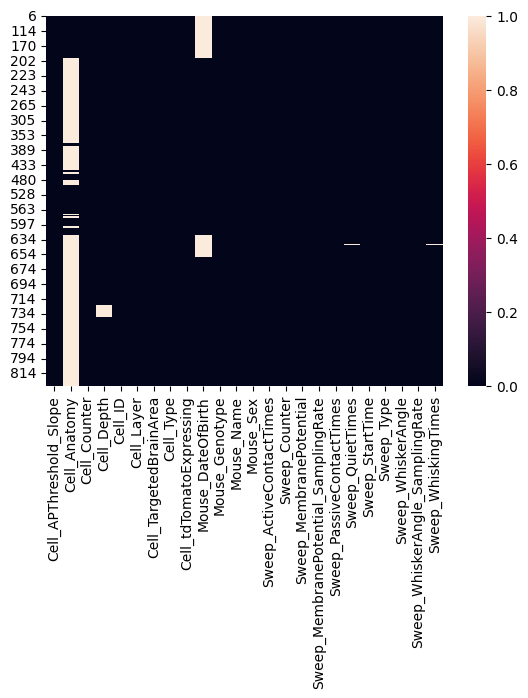

In [62]:
sns.heatmap(data_free_whisking.isna())

In [7]:
data_free_whisking.shape, data_free_whisking.dropna().shape

((497, 24), (393, 24))

In [ ]:
pca = PCA()

